In [1]:
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import numpy as np

In [2]:
import random
class KMeans:
    def __init__(self,n_clusters=2,max_iter=100):
        self.n_clusters=n_clusters
        self.max_iter=max_iter
        self.centroids= None
        
    def fit_predict(self,X):
        random_index=random.sample(range(0,X.shape[0]),self.n_clusters)
        self.centroids=X[random_index]
        
        for i in range(self.max_iter):
            #assign clusters
            cluster_group=self.assign_clusters(X)
            old_centroids=self.centroids
            #move centroids
            self.centroids=self.move_centroids(X,cluster_group)
            #check finish
            if (old_centroids==self.centroids).all():
                break 
        return cluster_group        
    
    def assign_clusters(self,X):
        cluster_group=[]
        distances=[]
        
        for row in X:
            for centroid in self.centroids:
                distances.append(np.sqrt(np.dot(row-centroid,row-centroid)))
            min_distances=min(distances)
            index_pos=distances.index(min_distances)
            cluster_group.append(index_pos)
            distances.clear()
            
        return np.array(cluster_group)
    
    def move_centroids(self,X,cluster_group):
        new_centroids=[]
        
        cluster_type=np.unique(cluster_group)
        
        for type in cluster_type:
            new_centroids.append(X[cluster_group==type].mean(axis=0))
        return np.array(new_centroids)    

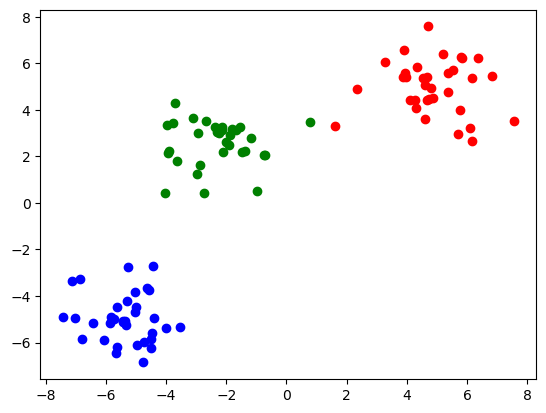

In [3]:

centroids=[(-5,-5),(5,5),(-2.5,2.5)]
cluster_std=[1,1,1]

X,y= make_blobs(n_samples=100,cluster_std=cluster_std,centers=centroids,n_features=2,random_state=2)

km= KMeans(n_clusters=3,max_iter=100)
y_means=km.fit_predict(X)
plt.scatter(X[y_means==0,0],X[y_means==0,1],color='red')
plt.scatter(X[y_means==1,0],X[y_means==1,1],color='blue')
plt.scatter(X[y_means==2,0],X[y_means==2,1],color='green')
plt.show()